![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Proyecto 1 - Predicción de precios de vehículos usados

## Solución - Equipo 3

Integrantes:
- Francisco Martino
- Edgar Garcia
- Dayana Ortega
- Edgar Garcia

## 1. Preprocesamiento de Datos

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
# Importación librerías
import pandas as pd
import numpy as np

# Librerias para gráficos y visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

#Librerías para preprocesamiento y codificación
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from xgboost import XGBRegressor
import category_encoders as ce

import math


In [4]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTest_carListings.zip', index_col=0)

In [256]:
# Visualización datos de entrenamiento
dataTraining.head()

,Price,Year,Mileage,State,Make,Model
0,34995,2017,9913,FL,Jeep,Wrangler
1,37895,2015,20578,OH,Chevrolet,Tahoe4WD
2,18430,2012,83716,TX,BMW,X5AWD
3,24681,2014,28729,OH,Cadillac,SRXLuxury
4,26998,2013,64032,CO,Jeep,Wrangler


In [257]:
# Visualización datos de test
dataTesting.head()

,Year,Mileage,State,Make,Model
ID,,,,,
0,2014,31909,MD,Nissan,MuranoAWD
1,2017,5362,FL,Jeep,Wrangler
2,2014,50300,OH,Ford,FlexLimited
3,2004,132160,WA,BMW,5
4,2015,25226,MA,Jeep,Grand


In [165]:
# Evaluación de nulos en set de entrenamiento
dataTraining.isna().sum()

Price      0
Year       0
Mileage    0
State      0
Make       0
Model      0
dtype: int64

In [258]:
# Tratamiento de variables categóricas en set de entrenamiento
dataTraining['State'] = LabelEncoder().fit_transform(dataTraining['State'])
dataTraining['Make'] = LabelEncoder().fit_transform(dataTraining['Make'])
dataTraining['Model'] = LabelEncoder().fit_transform(dataTraining['Model'])

In [259]:
# Descriptivos del Set de entrenamiento
dataTraining.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,400000.0,21146.919312,10753.664940,5001.0,13499.0,18450.0,26999.0,79999.0
Year,400000.0,2013.198125,3.292326,1997.0,2012.0,2014.0,2016.0,2018.0
Mileage,400000.0,55072.956895,40881.018845,5.0,25841.0,42955.0,77433.0,2457832.0
State,400000.0,24.034658,15.325588,0.0,9.0,24.0,39.0,50.0
Make,400000.0,15.833530,10.299097,0.0,8.0,13.0,20.0,37.0
Model,400000.0,254.827082,148.634414,0.0,124.0,248.0,404.0,524.0


In [267]:
# Tratamiento de variables categóricas en set de prueba
dataTesting['State'] = LabelEncoder().fit_transform(dataTesting['State'])
dataTesting['Make'] = LabelEncoder().fit_transform(dataTesting['Make'])
dataTesting['Model'] = LabelEncoder().fit_transform(dataTesting['Model'])

In [268]:
# Descriptivos del Set de prueba
dataTesting.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,100000.0,2013.19337,3.281366,1997.0,2012.0,2014.0,2016.00,2018.0
Mileage,100000.0,55090.30418,40961.270168,5.0,25898.0,43128.0,77315.25,1428913.0
State,100000.0,23.94423,15.312363,0.0,9.0,23.0,38.00,50.0
Make,100000.0,15.28286,9.953044,0.0,8.0,12.0,19.00,36.0
Model,100000.0,253.68421,148.358312,0.0,123.0,248.0,400.00,524.0


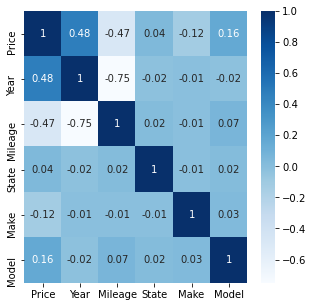

In [37]:
# Matriz de correlaciones en set de entrenamiento
plt.figure(figsize=(5, 5))
corr = dataTraining.corr()
sns.heatmap(round(corr,2), annot=True, cmap="Blues", annot_kws={'size': 10})
plt.show()

<AxesSubplot:xlabel='Year'>

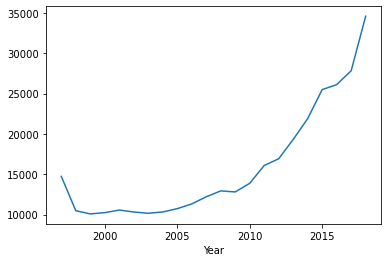

In [272]:
# Análisis de Precio promedio según año de fabricación
dataTraining.groupby('Year').Price.mean().plot()

## 2. Calibración del Modelo

In [273]:
# Partimos los datasets en Train y Test 

X=dataTraining.iloc[:,1:6]
y=dataTraining.Price

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)

In [274]:
# Modelo 1: Regresion Lineal simple

linmod=LinearRegression()
linmod.fit(XTrain,yTrain)

prediccion=linmod.predict(XTest)

mse = metrics.mean_squared_error(yTest, prediccion, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse)



El mean_squared_error en la muestra de test es:
8949.031509811592


In [263]:
#Modelo 2: Random Forest

# Definición de modelo Random Forest para un problema de regresión
clf = RandomForestRegressor(random_state=1, n_jobs=-1 )
clf.fit(XTrain, yTrain)

prediccion=clf.predict(XTest)

mse = metrics.mean_squared_error(yTest, prediccion, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse)

El mean_squared_error en la muestra de test es:
3808.0782097420347


max_mse:  -24229603.50843081
feat_max_mse:  21


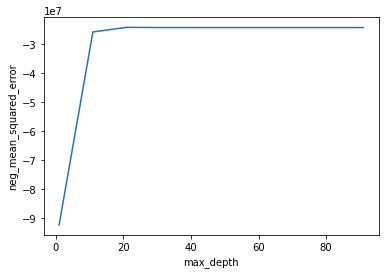

In [60]:
# Calibración

# Calibración de max_depth

# Creación de lista de valores para iterar sobre diferentes valores de max_depth
depth_range =  range(1, 100,10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_depth
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de max_depth
for depth in depth_range:
    clf = RandomForestRegressor(max_depth=depth, random_state=1, n_jobs=-1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())
    
plt.plot(depth_range, mse_scores)
plt.xlabel('max_depth')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_depth = np.max(mse_scores)
depth_max_mse = depth_range[mse_scores.index(max_mse_depth)]
print("max_mse: ", max_mse_depth)
print("feat_max_mse: ", depth_max_mse)

max_mse:  -24058010.18252657
feat_max_mse:  270


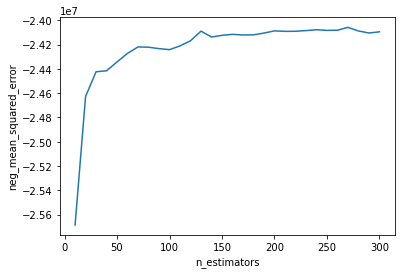

In [61]:
#Calibración de n_estimators

# Creación de lista de valores para iterar sobre diferentes valores de n_estimators
estimator_range =  range(10, 310, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de n_estimators
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de n_estimators
for estimator in estimator_range:
    clf = RandomForestRegressor(max_depth=20, n_estimators=estimator, random_state=1, n_jobs=-1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

plt.plot(estimator_range, mse_scores)
plt.xlabel('n_estimators')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_estimator = np.max(mse_scores)
estimator_max_mse = estimator_range[mse_scores.index(max_mse_estimator)]
print("max_mse: ", max_mse_estimator)
print("feat_max_mse: ", estimator_max_mse)

max_mse:  -24062307.874021895
feat_max_mse:  4


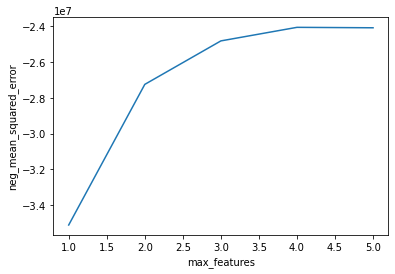

In [62]:
# Calibración de max_features

# Creación de lista de valores para iterar sobre diferentes valores de max_features
feature_range = range(1, len(XTrain.columns)+1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de max_features
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de max_features
for feature in feature_range:
    clf = RandomForestRegressor(max_depth=20, n_estimators=200,max_features=feature, random_state=1, n_jobs=-1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs la cantidad de max_features
plt.plot(feature_range, mse_scores)
plt.xlabel('max_features')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_feature = np.max(mse_scores)
feature_max_mse = feature_range[mse_scores.index(max_mse_feature)]
print("max_mse: ", max_mse_feature)
print("feat_max_mse: ", feature_max_mse)

In [264]:
#Random Forest Calibrado

# Definición de modelo Random Forest para un problema de regresión
clf = RandomForestRegressor(max_depth=21, n_estimators=300, max_features=4, random_state=1, n_jobs=-1 )
#clf = RandomForestRegressor(max_depth=21, n_estimators=270, max_features=2, random_state=1, n_jobs=-1 )
clf.fit(XTrain, yTrain)

prediccion=clf.predict(XTest)

mse = metrics.mean_squared_error(yTest, prediccion, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse)

El mean_squared_error en la muestra de test es:
3648.5144181799037


In [206]:
#Modelo 3: XGBoost

clf = XGBRegressor(
    random_state=1)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(XTrain, yTrain)
y_pred = clf.predict(XTest)
mse= metrics.mean_squared_error(y_pred, yTest.values, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse)



El mean_squared_error en la muestra de test es:
3902.9019293329175


max_mse:  -21086268.08717472
feat_max_mse:  0.21


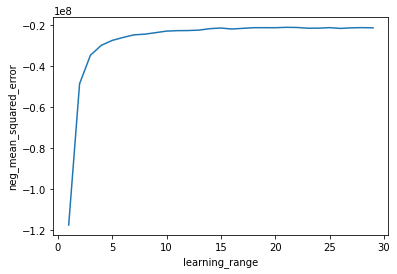

In [65]:
# Calibración

# Calibración de learning_rate

# Creación de lista de valores para iterar sobre diferentes valores de learning_rate
learning_range = range(1, 30, 1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de learning_rate
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de learning_rate
for l in learning_range:
    clf = XGBRegressor(learning_rate= l/100, random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs learning_rate
plt.plot(learning_range, mse_scores)
plt.xlabel('learning_range')
plt.ylabel('neg_mean_squared_error')


# Mejores parámetros
max_mse_lrate = np.max(mse_scores)
lrate_max_mse = learning_range[mse_scores.index(max_mse_lrate)]/100
print("max_mse: ", max_mse_lrate)
print("feat_max_mse: ", lrate_max_mse)

max_mse:  -21338200.407705504
pgamma_max_mse:  0


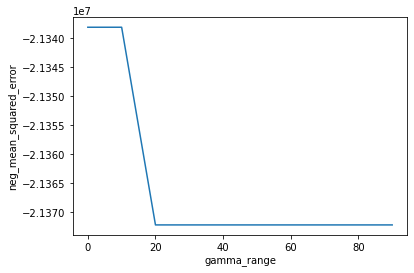

In [66]:
# Calibración de gamma

# Creación de lista de valores para iterar sobre diferentes valores de gamma
gamma_range = range(0, 100, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de gamma
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de gamma
for g in gamma_range:
    clf = XGBRegressor(learning_rate=0.29, gamma= g, random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs gamma
plt.plot(gamma_range, mse_scores)
plt.xlabel('gamma_range')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_pgamma = np.max(mse_scores)
pgamma_max_mse = gamma_range[mse_scores.index(max_mse_pgamma)]
print("max_mse: ", max_mse_pgamma)
print("pgamma_max_mse: ", pgamma_max_mse)

max_mse:  -24557826.722545095
max_depth_max_mse:  10


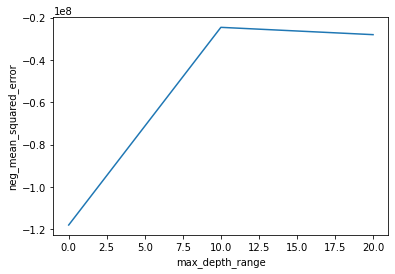

In [68]:
# Calibración de max_depth

# Creación de lista de valores para iterar sobre diferentes valores de gamma
max_depth_range = range(0, 30, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de gamma
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de gamma
for m in max_depth_range:
    clf = XGBRegressor(learning_rate=0.29, max_depth= m, random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs gamma
plt.plot(max_depth_range, mse_scores)
plt.xlabel('max_depth_range')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_pgamma = np.max(mse_scores)
pgamma_max_mse = max_depth_range[mse_scores.index(max_mse_pgamma)]
print("max_mse: ", max_mse_pgamma)
print("max_depth_max_mse: ", pgamma_max_mse)

max_mse:  -24394742.248457503
max_depth_max_mse:  60


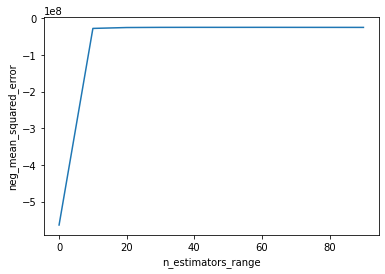

In [69]:
# Calibración de n_estimators

# Creación de lista de valores para iterar sobre diferentes valores de gamma
n_estimators_range = range(0, 100, 10)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de gamma
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de gamma
for e in n_estimators_range:
    clf = XGBRegressor(learning_rate=0.29, max_depth= 10, n_estimators=e, random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs gamma
plt.plot(n_estimators_range, mse_scores)
plt.xlabel('n_estimators_range')
plt.ylabel('neg_mean_squared_error')

# Mejores parámetros
max_mse_pgamma = np.max(mse_scores)
pgamma_max_mse = n_estimators_range[mse_scores.index(max_mse_pgamma)]
print("max_mse: ", max_mse_pgamma)
print("max_depth_max_mse: ", pgamma_max_mse)

max_mse:  -32375896.48919301
feat_max_mse:  0.29


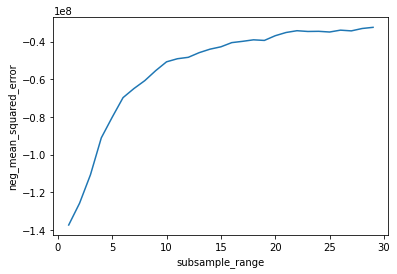

In [72]:
# Calibración de subsample

# Creación de lista de valores para iterar sobre diferentes valores de learning_rate
subsample_range = range(1, 30, 1)

# Definición de lista para almacenar la exactitud (accuracy) promedio para cada valor de learning_rate
mse_scores = []

# Uso de un 5-fold cross-validation para cada valor de learning_rate
for s in subsample_range:
    clf = XGBRegressor(learning_rate=0.29, max_depth= 10, n_estimators=e, subsample= s/100, random_state=1)
    mse_scores.append(cross_val_score(clf, XTrain, yTrain, cv=5, scoring='neg_mean_squared_error').mean())

# Gráfica del desempeño del modelo vs learning_rate
plt.plot(subsample_range, mse_scores)
plt.xlabel('subsample_range')
plt.ylabel('neg_mean_squared_error')


# Mejores parámetros
max_mse_lrate = np.max(mse_scores)
lrate_max_mse = subsample_range[mse_scores.index(max_mse_lrate)]/100
print("max_mse: ", max_mse_lrate)
print("feat_max_mse: ", lrate_max_mse)

In [275]:
#XGBoost Calibrado

clf = XGBRegressor(
    learning_rate=0.29,
    gamma=0,
    max_depth=10,
    n_estimators=60, 
    subsample=0.29, 
    random_state=1)

# Entrenamiento (fit) y desempeño del modelo XGBClassifier
clf.fit(XTrain, yTrain)
y_pred = clf.predict(XTest)
mse= metrics.mean_squared_error(y_pred, yTest.values, squared=False)
print('El mean_squared_error en la muestra de test es:')
print(mse)


El mean_squared_error en la muestra de test es:
3726.438332628222


In [266]:
# Predicción del conjunto de test

Dataset=dataTesting.iloc[:,:]

# Definición de modelo Random Forest para un problema de regresión
clf = RandomForestRegressor(max_depth=21, n_estimators=300, max_features=4, random_state=1, n_jobs=-1)
clf.fit(XTrain, yTrain)

prediccion=clf.predict(Dataset)

y_pred = pd.DataFrame(prediccion, index=Dataset.index, columns=['Price'])
y_pred

,Price
ID,
0,18515.479378
1,34212.540709
2,23960.747300
3,9863.857755
4,31189.176238
...,...
99995,22706.482036
99996,39819.032056
99997,19819.542257


In [137]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission.csv', index_label='ID')
y_pred.head()

,Price
ID,
0,18680.703125
1,36726.113281
2,21527.441406
3,8950.586914
4,30080.765625


In [2]:
# Entrenamiento Final del Modelo para el API

# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

#Tomamos una muestra para que el api no sea pesado
dataTraining=dataTraining.sample(10000)

# Tratamiento de variables categóricas en set de entrenamiento
dataTraining['State'] = LabelEncoder().fit_transform(dataTraining['State'])
dataTraining['Make'] = LabelEncoder().fit_transform(dataTraining['Make'])
dataTraining['Model'] = LabelEncoder().fit_transform(dataTraining['Model'])

# Partimos los datasets en Train y Test 

X=dataTraining.iloc[:,1:6]
y=dataTraining.Price

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=0)

#clf = RandomForestRegressor(max_depth=21, n_estimators=300, max_features=4, random_state=1, n_jobs=-1 )
clf = RandomForestRegressor(random_state=1, n_jobs=-1 )
clf.fit(XTrain, yTrain)



RandomForestRegressor(n_jobs=-1, random_state=1)

In [4]:
# Exportar modelo a archivo binario .pkl
import joblib
import os
os.chdir('..')

joblib.dump(clf, 'model_deployment_proyecto1/pricing_clf.pkl', compress=3)

['model_deployment/pricing_clf.pkl']

In [1]:
# Importar modelo y predicción
#import os
#os.chdir('..')

from model_deployment_proyecto1.modelo_pricing_deployment import predict_price



predict_price(2013,5000,"WA","Toyota","Yaris")

array([20718.77])

In [2]:
#pip install werkzeug==0.16

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from flask import Flask
from flask_restplus import Api, Resource, fields
import joblib
from model_deployment_proyecto1.modelo_pricing_deployment import predict_price

app = Flask(__name__)

api = Api(
    app, 
    version='1.0', 
    title='Pricing Prediction API',
    description='Pricing Prediction API')

ns = api.namespace('predict', 
     description='Pricing Predictor')
   
parser = api.parser()

parser.add_argument(
    'Year', 
    type=int, 
    required=True, 
    help='Año de fabricación del vehiculo', 
    location='args')

parser.add_argument(
    'Mileage', 
    type=int, 
    required=True, 
    help='Kilometraje del vehiculo', 
    location='args')

parser.add_argument(
    'State', 
    type=str, 
    required=True, 
    help='Estado donde se compró el vehiculo', 
    location='args')

parser.add_argument(
    'Make', 
    type=str, 
    required=True, 
    help='Marca del vehiculo', 
    location='args')

parser.add_argument(
    'Model', 
    type=str, 
    required=True, 
    help='Modelo del vehiculo', 
    location='args')

resource_fields = api.model('Resource', {
    'result': fields.String,
})

@ns.route('/')
class PricingApi(Resource):

    @api.doc(parser=parser)
    @api.marshal_with(resource_fields)
    def get(self):
        args = parser.parse_args()
        
        return {
         "result": predict_price(args['Year'],args['Mileage'],args['State'],args['Make'],args['Model'])
        }, 200
    
    
if __name__ == '__main__':
    app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://0.0.0.0:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/Apr/2022 15:48:30] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/Apr/2022 15:48:31] "GET /swagger.json HTTP/1.1" 200 -
127.0.0.1 - - [30/Apr/2022 15:49:11] "GET /predict/?Year=2013&Mileage=5000&State=WA&Make=Toyota&Model=Yaris HTTP/1.1" 200 -


In [ ]:
# Ejecución de la aplicación que disponibiliza el modelo de manera local en el puerto 5000
#app.run(debug=True, use_reloader=False, host='0.0.0.0', port=5000)